#  KNeighbors Classifier for Credit Card Fraud Detection

In [1]:
#importing libraries
import pandas as pd        #for dataframe data structure
import numpy as np         # for numpy arrays and scientific computations

import matplotlib.pyplot as plt      #for data visualization
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier            #for KMeans Model
from sklearn import metrics                            #for evaluation metrics
                                                       
import seaborn as sns                                  #for visualization
from sklearn.preprocessing import StandardScaler       #for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV


In [2]:
from imblearn.over_sampling import ADASYN  

Using TensorFlow backend.


In [3]:
#importing dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data=df[:20000]

In [5]:
#Creating predictor and target variables
X=data.copy()
X.drop(['Class'],axis=1,inplace=True)
y=data['Class']

In [6]:
X = StandardScaler().fit_transform(X)
print(X.shape)
print(type(X))

(20000, 30)
<class 'numpy.ndarray'>


In [7]:
#Splitting dataset into Trainset and Testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (16000, 30)
Number transactions y_train dataset:  (16000,)
Number transactions X_test dataset:  (4000, 30)
Number transactions y_test dataset:  (4000,)


In [8]:
#X_train=X[0:16000]

In [9]:
CV_Scores = []
knn = KNeighborsClassifier(n_neighbors = 6, algorithm = 'kd_tree')
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='recall')
CV_Scores.append(scores.mean())

In [10]:
CV_Scores

[0.7782051282051283]

In [11]:
scores

array([0.58333333, 0.76923077, 0.84615385, 0.92307692, 0.76923077])

## Selecting the best value of n_neighbors

In [12]:
myList = list(range(0,25))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

CV_Scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

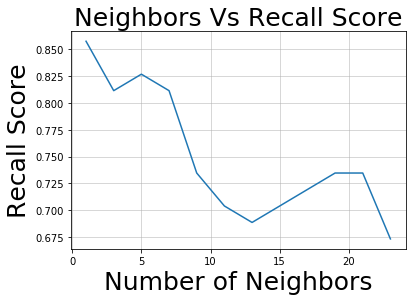

In [13]:
plt.plot(neighbors, CV_Scores)
plt.title("Neighbors Vs Recall Score", fontsize=25)
plt.xlabel("Number of Neighbors", fontsize=25)
plt.ylabel("Recall Score", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)
CV_Scores.append(scores.mean())

In [14]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

## Fitting Best Model

In [18]:
best_knn = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')
best_knn.fit(X_train,y_train)
y_pred=best_knn.predict(X_test)

In [19]:
E=(y_pred != y_test).sum()
T=metrics.accuracy_score(y_test,y_pred)
F=metrics.f1_score(y_test,y_pred,average='weighted')
C=metrics.classification_report(y_test,y_pred)

print("Number of Errors : ",E)
print("Test Accuracy score : ",T)
print("F1- Score : ",F)
print("Classification Report : ",C)


Number of Errors :  7
Test Accuracy score :  0.99825
F1- Score :  0.998132306172806
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3979
           1       0.94      0.71      0.81        21

    accuracy                           1.00      4000
   macro avg       0.97      0.86      0.90      4000
weighted avg       1.00      1.00      1.00      4000



## Final Report

In [23]:
print("=====================  K Neighbors Classifier Analysis Report   ======================")
one=pd.DataFrame([E,T,F,1.00,0.71,1])
res=pd.concat([one],axis=1)
rows=pd.DataFrame(['No.of Error','Accuracy Score','F1-Score','Class0 Recall','Class1 Recall','n_neighbors'])
res=pd.concat([res,rows],axis=1)
res.columns=['BEST MODEL','Criteria']
res.set_index("Criteria", inplace = True) 
res

=====================  K Neighbors Classifier Analysis Report   ======================


,BEST MODEL
Criteria,
No.of Error,7.000000
Accuracy Score,0.998250
F1-Score,0.998132
Class0 Recall,1.000000
Class1 Recall,0.710000
n_neighbors,1.000000
